#  Histogramas

Un histograma de una imagen se puede considerar  como una  representación que nos brinda información  acerca de la distribución de la intensidad . Si una imagen ha sido expuesta correctamente, si la iluminación es áspera o plana, y qué ajustes funcionarán mejor. 

Cada píxel en una imagen tiene un color que ha sido producido por alguna combinación de los colores primarios rojo, verde y azul (RGB). Cada uno de estos colores puede tener un valor de brillo comprendido entre 0 y 255 para una imagen digital con una profundidad de 8-bits.En el eje x se representa la intensidad (que van de 0 a 255, no siempre) y en el eje y el número de píxeles.


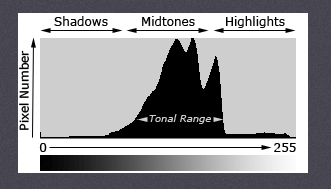

In [1]:
from IPython.display import Image
Image(filename='tono.png')

### 1. Cálculo del histograma en OpenCV


La función cv2.calcHist() encuentra el histograma de una imagen. Sus parámetros son:

cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])

- Imágenes: es la imagen de la fuente de uint8 tipo o float32. Se debe dar entre corchetes, es decir, "[img]".
- Canales: también se da entre corchetes. Es el índice de canal para el que se calcula el histograma. Por ejemplo, si la entrada es una imagen en escala de grises, su valor es [0]. Si es una imagen a color, puedes pasar a [0], [1] o [2] para el cálculo del histograma del canal azul, verde o rojo, respectivamente.
- Máscara: la máscara de imagen. Para encontrar el histograma completo de la imagen se da su valor como "None". Pero si se quiere encontrar el histograma de una región particular de la imagen, hay que crear una máscara para seleccionar el valor
- HistSize: representa nuestra cuenta BIN. Necesitará ser dada entre corchetes. Para la escala completa, pasamos [256].
- gamas: este es nuestro rango. Normalmente, es [0,256].


In [4]:
%pylab inline
import cv2

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


In [9]:
img = cv2.imread('gato_gris.jpg',0)
hist = cv2.calcHist([img],[0],None,[256],[0,256])


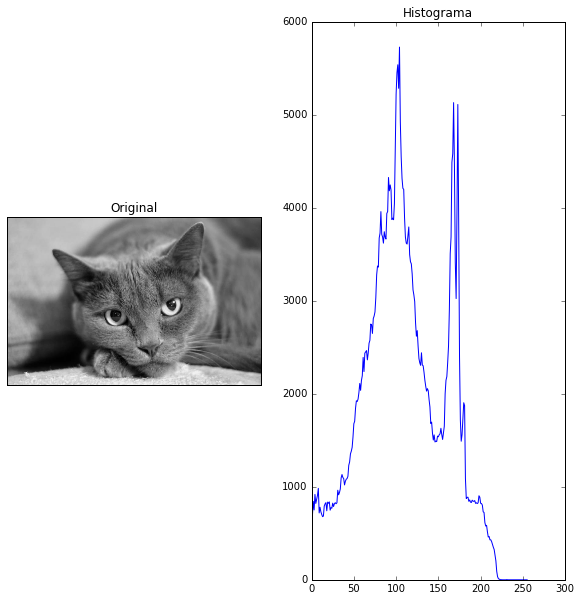

In [15]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.plot(hist)
plt.title('Histograma')
plt.show()


## 2. Cálculo del histograma en Numpy

OpenCV function is more faster than (around 40X) than np.histogram(). So stick with OpenCV function

In [16]:

hist,bins = np.histogram(img.ravel(),256,[0,256])

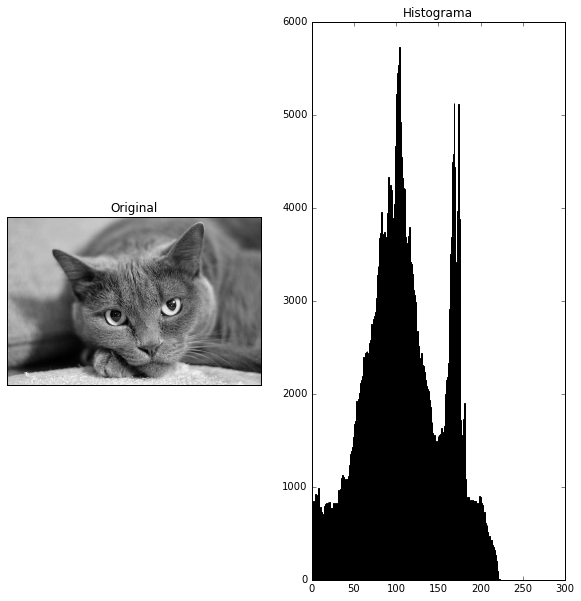

In [23]:
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('gato_gris.jpg',0)

plt.figure(figsize=(10,10))
plt.subplot(1,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.hist(img.ravel(),256,[0,256])
plt.title('Histograma')
plt.show()



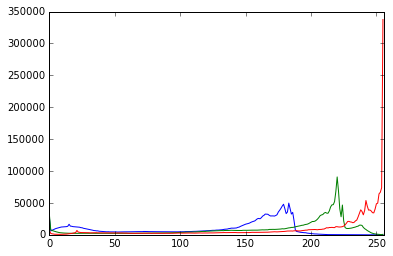

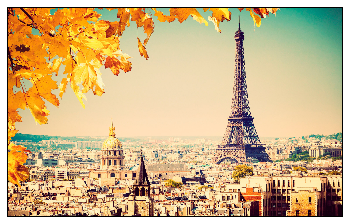

In [29]:
img = cv2.imread('paris.jpg')
b,g,r = cv2.split(img)
img2 = cv2.merge([r,g,b])

color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()
plt.imshow(img2)
plt.xticks([]), plt.yticks([])
plt.show()

### 3. Histograma de regiones

Utilizamos cv2.calcHist () para encontrar el histograma de la imagen completa. ¿Qué pasa si usted quiere encontrar histogramas de algunas regiones de una imagen? Basta con crear una imagen de la máscara con el color blanco en la región que desee encontrar histograma y negro de otro modo.

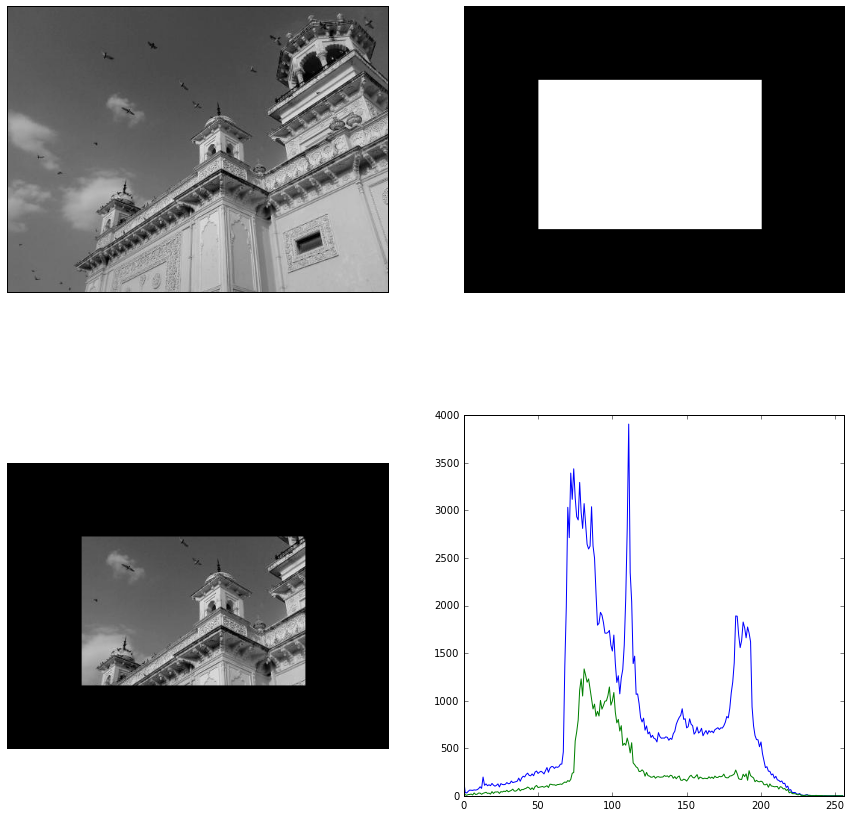

In [32]:
img = cv2.imread('home.jpg',0)
plt.figure(figsize=(15,15))
# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)

# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])

plt.subplot(221), plt.imshow(img, 'gray')
plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(mask,'gray')
plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])

plt.show()

# Ecualización del Histograma 

La ecualización del histograma de una imagen es una transformación que pretende obtener para una imagen un histograma con una distribución uniforme. Es decir, que exista el mismo número de pixels para cada nivel de gris del histograma de una imagen monocroma.

En teoría, la aplicación de esta operación debería transformar el histograma en otro con una forma perfectamente uniforme sobre todos los niveles de gris. Sin embargo, en la práctica esto no se va a poder conseguir pues se estaría trabajando con funciones de distribución discretas en lugar de continuas. En la transformación, todos los pixels de un mismo nivel de gris se transformarán a otro nivel de gris, y el histograma se distribuirá en todo el rango disponible separando en lo posible las ocupaciones de cada nivel.

El resultado de la ecualización maximiza el contraste de una imagen sin perder información de tipo estructural

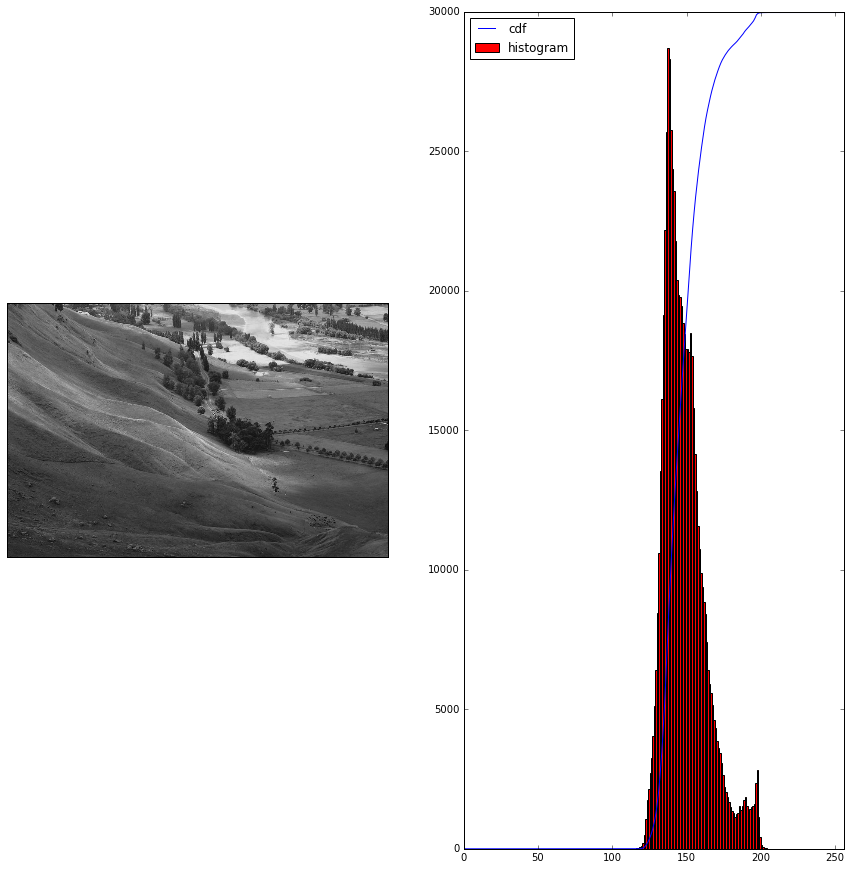

In [50]:
img = cv2.imread('paisaje.jpg',0)

hist,bins = np.histogram(img.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf*30000.0 / 700000.0
plt.figure(figsize=(15,15))
plt.subplot(121), plt.imshow(img, 'gray')
plt.xticks([]), plt.yticks([])

plt.subplot(122),
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [51]:
equ = cv2.equalizeHist(img)

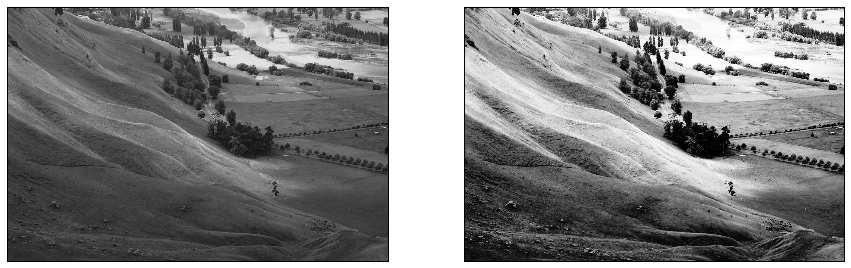

In [52]:
plt.figure(figsize=(15,15))
plt.subplot(121), plt.imshow(img, 'gray')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(equ, 'gray')
plt.xticks([]), plt.yticks([])

plt.show()

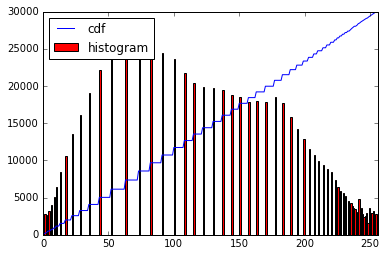

In [58]:
hist,bins = np.histogram(equ.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf *30000.0 / 700000.0
plt.plot(cdf_normalized, color = 'b')
plt.hist(equ.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

### CLAHE (Contrast Limited Adaptive Histogram Equalization)

La primera ecualización del histograma que acabamos de ver considera el contraste global de la imagen. En muchos casos, no es una buena idea. Por ejemplo, la imagen siguiente muestra una imagen de entrada y su resultado después de la ecualización global del histograma .

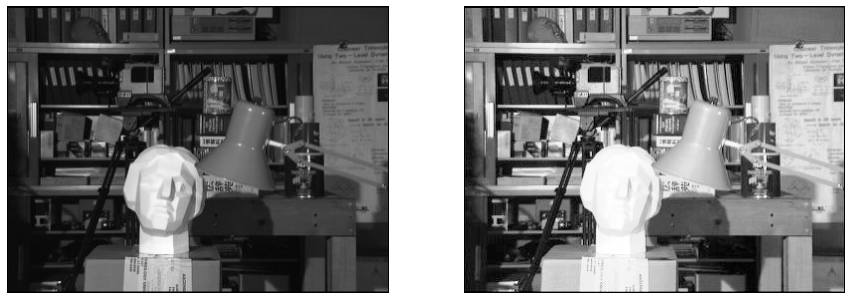

In [62]:
img = cv2.imread('cabeza.jpg',0) 
equ = cv2.equalizeHist(img)
plt.figure(figsize=(15,15))
plt.subplot(121), plt.imshow(img, 'gray')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(equ, 'gray')
plt.xticks([]), plt.yticks([])

plt.show()

Si bien el contraste de fondo ha mejorado después de la ecualización del histograma. Hemos perdido la mayor parte de la información  de la cara debido a un exceso de brillo. Lo anterior debido a que el histograma no se limita a una región particular.

Así que para resolver este problema, se utiliza ecualización adaptativa. En esta imagen se divide en pequeños bloques llamados "baldosas" ( 8x8 por defecto en OpenCV). Se ecualiza el histograma de una pequeña región (a menos que haya ruido). Si el ruido esta allí este será amplificado. Para evitar esto, se limita el contraste. Si alguna frecuencia del histograma está por encima del límite de contraste especificado (por defecto 40 en OpenCV), los píxeles se recortan y se distribuyen uniformemente a otros contenedores antes de aplicar ecualización del histograma. Después de la ecualización, para eliminar los artefactos en las fronteras de baldosas, se aplica la interpolación bilineal.



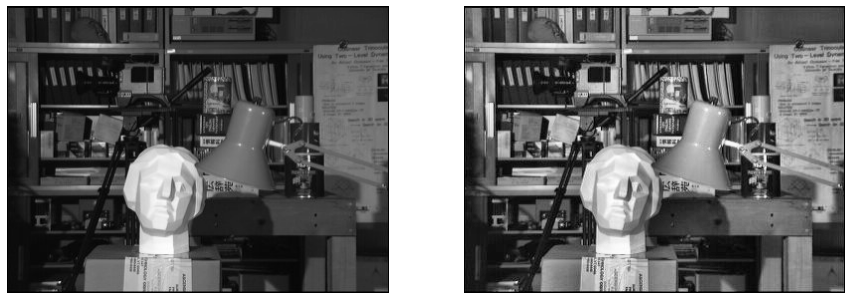

In [63]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)
plt.figure(figsize=(15,15))
plt.subplot(121), plt.imshow(img, 'gray')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cl1, 'gray')
plt.xticks([]), plt.yticks([])

plt.show()

# Filtrado en el dominio de la frecuencia


Los filtros de frecuencia procesan una imagen trabajando sobre el dominio de la frecuencia en la Transformada de Fourier de la imagen. Para ello, ésta se modifica siguiendo el Teorema de la Convolución correspondiente:

1. Se aplica la Transformada de Fourier,
2. Se multiplica posteriormente por la función del filtro que ha sido escogido,
3. Para concluir re-transformándola al dominio espacial empleando la Transformada Inversa de Fourier.
Teorema de la Convolución (frecuencia): 

$${\displaystyle G(u,v)=F(u,v)*H(u,v)} $$

$F(u,v)$: transformada de Fourier de la imagen original.

$H(u,v)$: filtro atenuador de frecuencias.

### Tipos:

Existen básicamente tres tipos distintos de filtros que pueden aplicarse:

1. Filtro paso bajo: atenúa las frecuencias altas y mantiene sin variaciones las bajas. El resultado en el dominio espacial es equivalente al de un filtro de suavizado, donde las altas frecuencias que son filtradas se corresponden con los cambios fuertes de intensidad. Consigue reducir el ruido suavizando las transiciones existentes.
2. Filtro paso alto: atenúa las frecuencias bajas manteniendo invariables las frecuencias altas. Puesto que las altas frecuencias corresponden en las imágenes a cambios bruscos de densidad, este tipo de filtros es usado, porque entre otras ventajas, ofrece mejoras en la detección de bordes en el dominio espacial, ya que estos contienen gran cantidad de dichas frecuencias. Refuerza los contrastes que se encuentran en la imagen.
3. Filtro paso banda: atenúa frecuencias muy altas o muy bajas manteniendo una banda de rango medio.

### Ventajas

- Método simple y sencillo de implementar.
- Fácil asociación del concepto de frecuencia con ciertas características de la imagen; cambios de tonalidad suaves implican frecuencias bajas y cambios bruscos frecuencias altas.
- Proporciona flexibilidad en el diseño de soluciones de filtrado.
- Rapidez en el filtrado al utilizar el Teorema de la Convolución.

### Desventajas

El ruido no puede ser eliminado completamente.

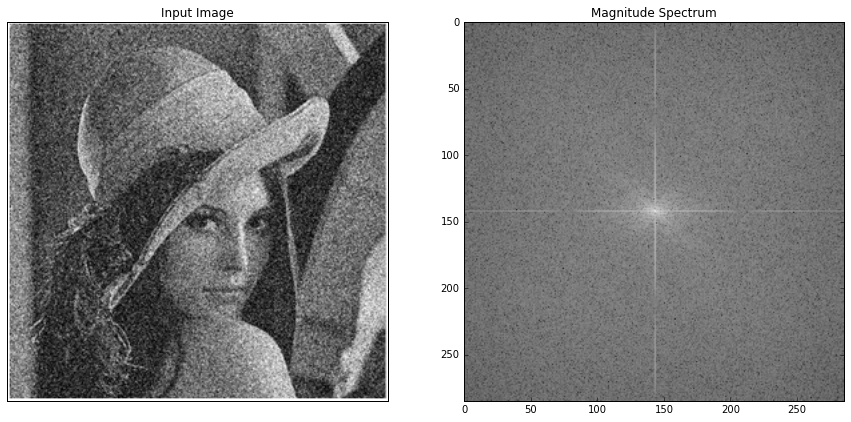

In [68]:
img = cv2.imread('ruido.png',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), 
plt.show()

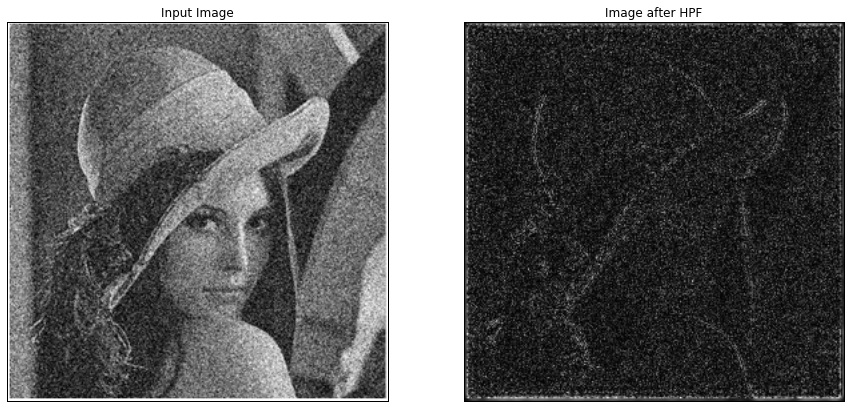

In [74]:
rows, cols = img.shape
crow,ccol = rows/2 , cols/2
fshift[crow-30:crow+30, ccol-30:ccol+30] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)
plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])

plt.show()

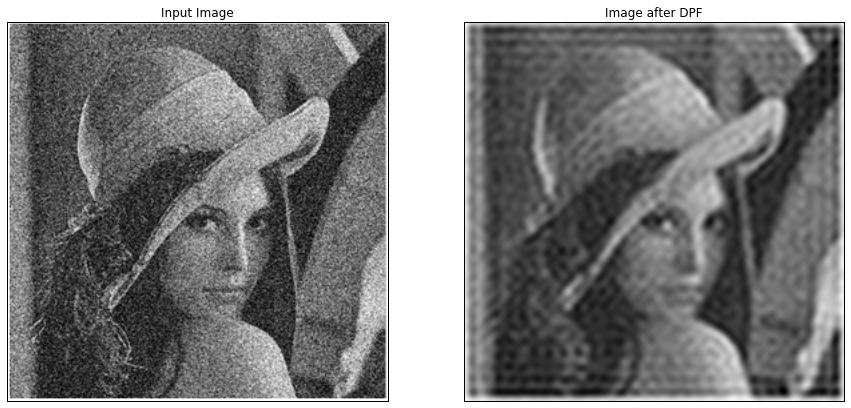

In [78]:
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
mask = np.zeros((rows,cols),np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

# apply mask and inverse DFT
fshift = fshift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)
plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after DPF'), plt.xticks([]), plt.yticks([])

plt.show()

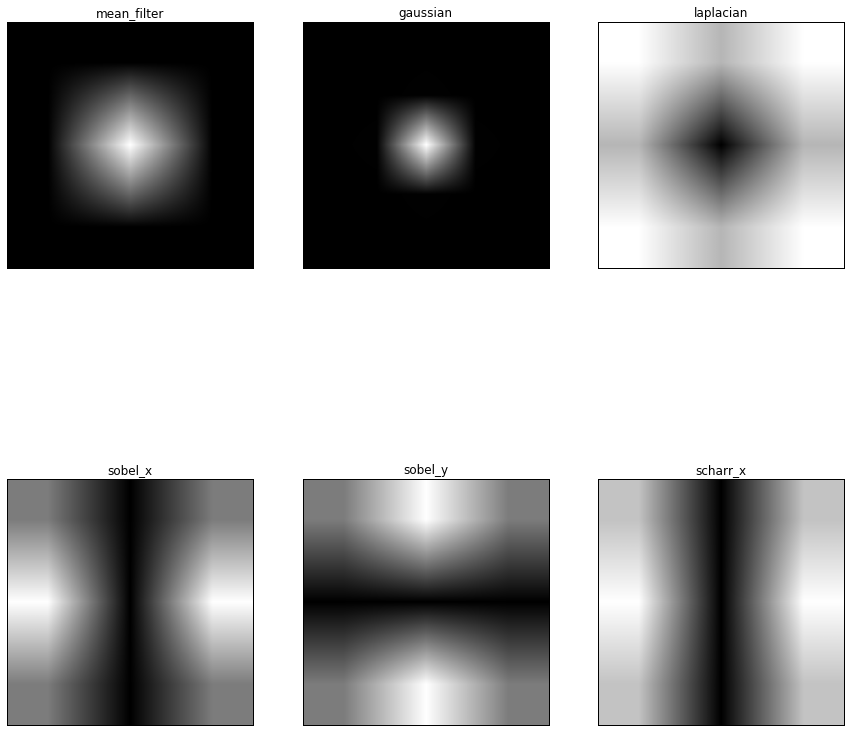

In [81]:
mean_filter = np.ones((3,3))

# creating a guassian filter
x = cv2.getGaussianKernel(5,10)
gaussian = x*x.T

# different edge detecting filters
# scharr in x-direction
scharr = np.array([[-3, 0, 3],
                   [-10,0,10],
                   [-3, 0, 3]])
# sobel in x direction
sobel_x= np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])
# sobel in y direction
sobel_y= np.array([[-1,-2,-1],
                   [0, 0, 0],
                   [1, 2, 1]])
# laplacian
laplacian=np.array([[0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]])

filters = [mean_filter, gaussian, laplacian, sobel_x, sobel_y, scharr]
filter_name = ['mean_filter', 'gaussian','laplacian', 'sobel_x', \
                'sobel_y', 'scharr_x']
fft_filters = [np.fft.fft2(x) for x in filters]
fft_shift = [np.fft.fftshift(y) for y in fft_filters]
mag_spectrum = [np.log(np.abs(z)+1) for z in fft_shift]

plt.figure(figsize=(15,15))
for i in xrange(6):
    plt.subplot(2,3,i+1),plt.imshow(mag_spectrum[i],cmap = 'gray')
    plt.title(filter_name[i]), plt.xticks([]), plt.yticks([])

plt.show()


# Comparación de plantillas 

Es un método para buscar y encontrar la ubicación de la imagen de una plantilla en una imagen más grande. OpenCV viene con un cv2.matchTemplate función () para este propósito. Es simplemente se desliza la imagen de plantilla sobre la imagen de entrada (como en la convolución 2D) y compara la plantilla y el parche de imagen de entrada de la imagen de la plantilla bajo. Varios métodos de comparación se implementan en OpenCV. (Puede comprobar documentación para más detalles). Devuelve una imagen en escala de grises, donde cada píxel indica cuánto hace la vecindad de ese partido píxeles con plantilla.

Si la imagen de entrada es de un tamaño (W x H) y la imagen de la plantilla es de tamaño (w,h), la imagen de salida tendrá un tamaño de (W-w + 1, H-h + 1). Una vez que ha obtenido el resultado, puede utilizar la función cv2.minMaxLoc () para encontrar dónde está el valor máximo / mínimo. Tomarlo como la esquina superior izquierda del rectángulo y tomar (w, h) como la anchura y la altura del rectángulo. Ese rectángulo es su región de plantilla.

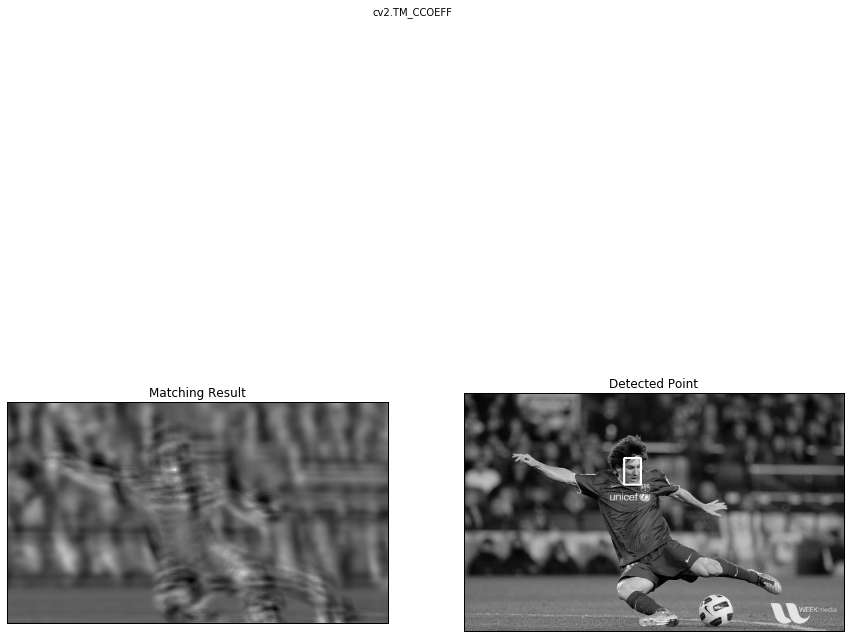

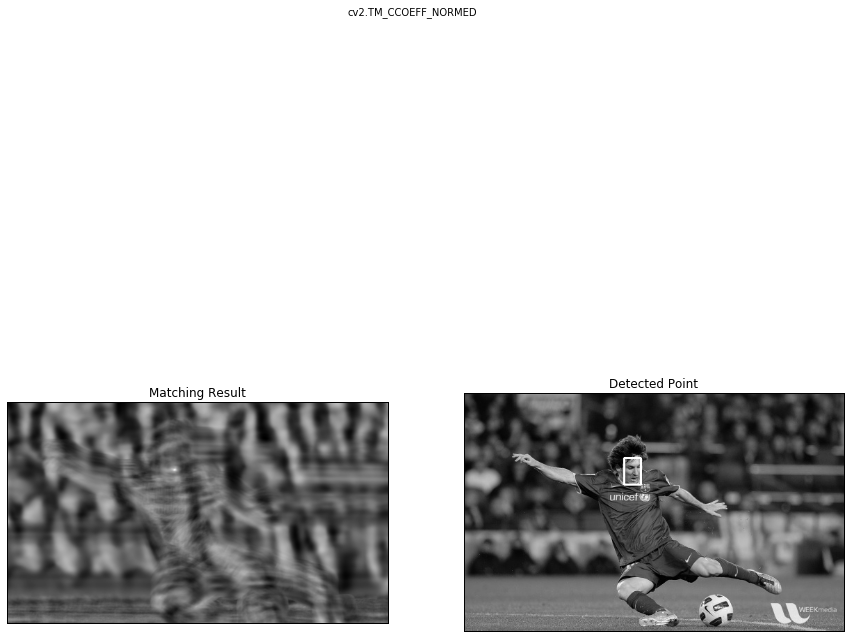

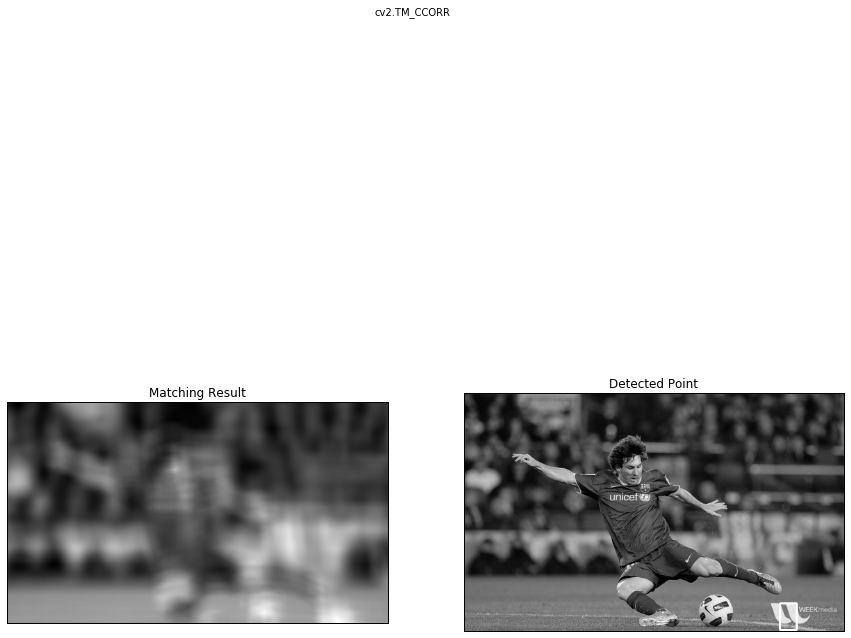

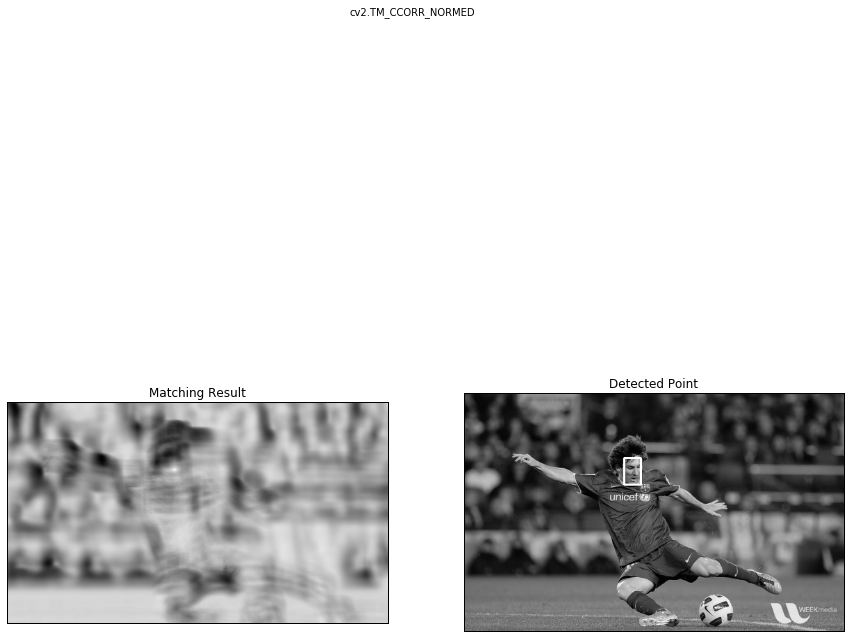

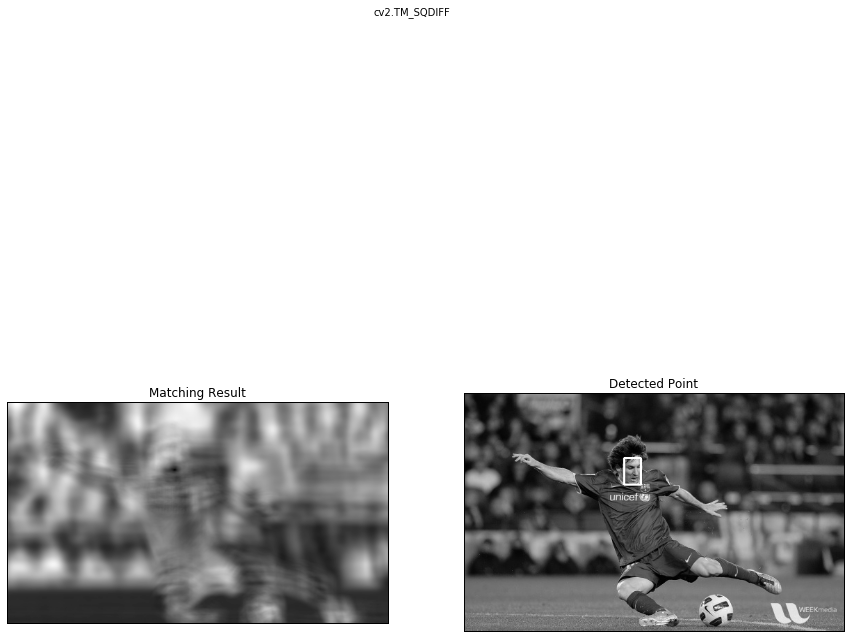

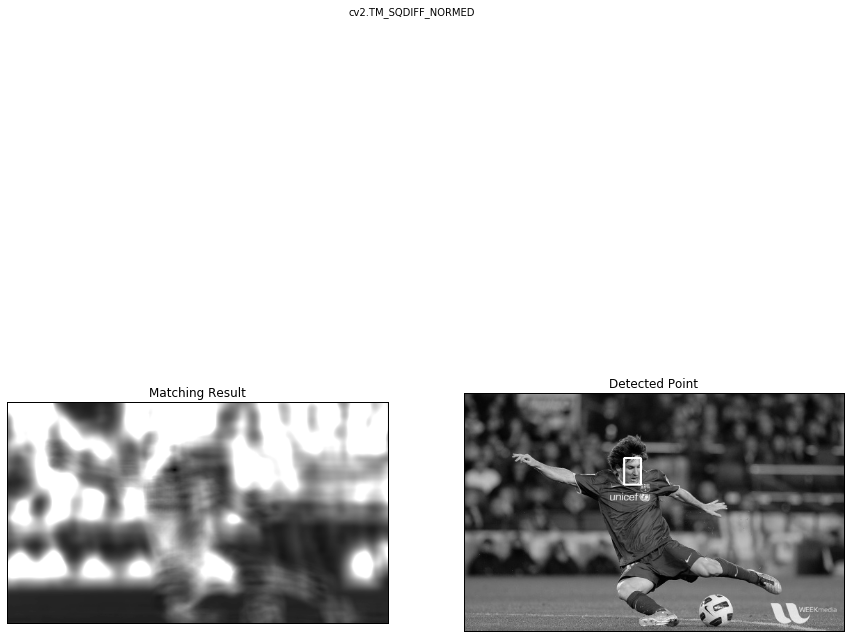

In [86]:
img = cv2.imread('messi5.jpg',0)
img2 = img.copy()
template = cv2.imread('template.jpg',0)
w, h = template.shape[::-1]

# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)

    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv2.rectangle(img,top_left, bottom_right, 255, 2)
    
    plt.figure(figsize=(15,15))
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)

    plt.show()